In [298]:
import sqlite3
import pandas as pd

<h1> Objective : Regression for overall player ratings

<h1> Exploratory Data Analysis and Pre-processing

In [299]:
# Connecting to the SQLite database

conn = sqlite3.connect('database.sqlite')

# Getting a list of all tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)['name'].tolist()

# Initializing a dictionary to hold DataFrames
dfs = {}

# Iterate over the list of tables
for table in tables:
    # Read each table into a DataFrame
    query = f"SELECT * FROM {table}"
    dfs[table] = pd.read_sql_query(query, conn)

# Close the connection to the database
conn.close()

# At this point, `dfs` is a dictionary where each key is a table name and each value is a DataFrame containing the table's data.



In [301]:
df_sqlite_sequence = dfs['sqlite_sequence']
df_Player_Attributes = dfs['Player_Attributes']
df_Player = dfs['Player']
df_Match = dfs['Match']
df_League = dfs['League']
df_Country = dfs['Country']
df_Team = dfs['Team']
df_Team_Attributes = dfs['Team_Attributes']

<h2> Pipeline on Player Attributes

In [302]:
df_Player_Attributes.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties  marking  standing_tackle  sliding_tackle  \
0  ...    54.0       48.0     65.0             69.0            69.0   
1  ...    54.0       48.0     65.0             69.0            69.0   
2  ...    54.0       48.0     65.0             66.0            69.0   
3  ...    53.0       47.0     62.0             63.0            66.0   
4  ...    53.0       47.0     62.0             63.0            66.0   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0        6.0         11.0        10.0             8.0          8.0  
1        6.0         11.0        10.0             8.0          8.0  
2        6.0         11.0        10.0             8.0          8.0  
3        5.0         10.0         9.0             7.0          7.0  
4        5.0         10.0         9.0             7.0          7.0  

[5 rows x 42 columns]

- Dropping all rows that have null values in any of the columns

In [303]:
df_Player_Attributes = df_Player_Attributes.dropna(how='any').copy()

In [304]:
df_Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180354 non-null  int64  
 1   player_fifa_api_id   180354 non-null  int64  
 2   player_api_id        180354 non-null  int64  
 3   date                 180354 non-null  object 
 4   overall_rating       180354 non-null  float64
 5   potential            180354 non-null  float64
 6   preferred_foot       180354 non-null  object 
 7   attacking_work_rate  180354 non-null  object 
 8   defensive_work_rate  180354 non-null  object 
 9   crossing             180354 non-null  float64
 10  finishing            180354 non-null  float64
 11  heading_accuracy     180354 non-null  float64
 12  short_passing        180354 non-null  float64
 13  volleys              180354 non-null  float64
 14  dribbling            180354 non-null  float64
 15  curve            

- <h3> Dropping Columns and converting object columns to float based on domain knowledge

In [305]:
# Assuming df is your DataFrame
columns_to_drop = ['date', 'player_fifa_api_id', 'id']
df_Player_Attributes = df_Player_Attributes.drop(columns=columns_to_drop)

In [306]:
df_Player_Attributes.head()

player_api_id  overall_rating  potential preferred_foot  \
0         505942            67.0       71.0          right   
1         505942            67.0       71.0          right   
2         505942            62.0       66.0          right   
3         505942            61.0       65.0          right   
4         505942            61.0       65.0          right   

  attacking_work_rate defensive_work_rate  crossing  finishing  \
0              medium              medium      49.0       44.0   
1              medium              medium      49.0       44.0   
2              medium              medium      49.0       44.0   
3              medium              medium      48.0       43.0   
4              medium              medium      48.0       43.0   

   heading_accuracy  short_passing  ...  vision  penalties  marking  \
0              71.0           61.0  ...    54.0       48.0     65.0   
1              71.0           61.0  ...    54.0       48.0     65.0   
2              71.0           61.0  ...    54.0       48.0     65.0   
3              70.0           60.0  ...    53.0       47.0     62.0   
4              70.0           60.0  ...    53.0       47.0     62.0   

   standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  \
0             69.0            69.0        6.0         11.0        10.0   
1             69.0            69.0        6.0         11.0        10.0   
2             66.0            69.0        6.0         11.0        10.0   
3             63.0            66.0        5.0         10.0         9.0   
4             63.0            66.0        5.0         10.0         9.0   

   gk_positioning  gk_reflexes  
0             8.0          8.0  
1             8.0          8.0  
2             8.0          8.0  
3             7.0          7.0  
4             7.0          7.0  

[5 rows x 39 columns]

In [307]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
num_unique_values = df_Player_Attributes['attacking_work_rate'].unique()
print(f"Number of unique values in 'column_name':", num_unique_values)

Number of unique values in 'column_name': ['medium' 'high' 'low' 'None' 'le' 'norm' 'stoc' 'y']


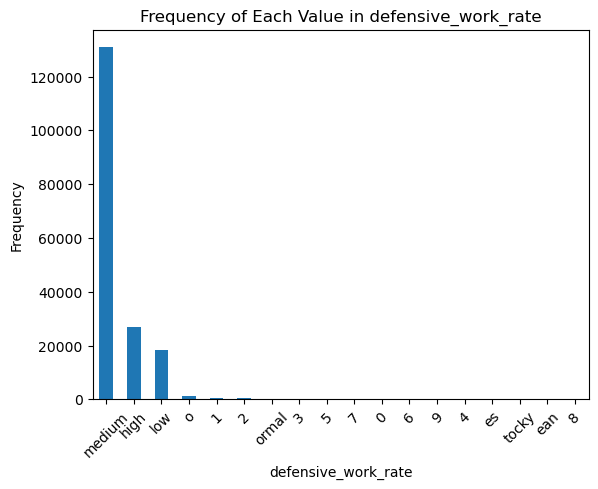

In [308]:
import matplotlib.pyplot as plt
value_counts = df_Player_Attributes['defensive_work_rate'].value_counts()

# Plotting
value_counts.plot(kind='bar')
plt.title('Frequency of Each Value in defensive_work_rate')
plt.xlabel('defensive_work_rate')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

- <h3> Because of insignificant count of everything apart from low, medium, high on the category columns, we'll drop rows where we encounter any values other than these

In [309]:
# Conditions for valid values
valid_values = ['low', 'medium', 'high']

# Update the DataFrame by keeping rows where both columns have valid values
df_Player_Attributes = df_Player_Attributes.loc[df_Player_Attributes['attacking_work_rate'].isin(valid_values) & 
                                        df_Player_Attributes['defensive_work_rate'].isin(valid_values)]


len(df_Player_Attributes )

176161

- <h3> mean imputing continuos variable and taking mode of categorical variables

In [310]:
numeric_cols = df_Player_Attributes.select_dtypes(include=['float64']).columns
df_numeric_mean = df_Player_Attributes.groupby('player_api_id')[numeric_cols].mean().reset_index()

In [311]:
object_cols = df_Player_Attributes.select_dtypes(include=['object']).columns
df_object_mode = df_Player_Attributes.groupby('player_api_id')[object_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()


In [312]:
final_df = pd.merge(df_numeric_mean, df_object_mode, on='player_api_id')

In [313]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9925 entries, 0 to 9924
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        9925 non-null   int64  
 1   overall_rating       9925 non-null   float64
 2   potential            9925 non-null   float64
 3   crossing             9925 non-null   float64
 4   finishing            9925 non-null   float64
 5   heading_accuracy     9925 non-null   float64
 6   short_passing        9925 non-null   float64
 7   volleys              9925 non-null   float64
 8   dribbling            9925 non-null   float64
 9   curve                9925 non-null   float64
 10  free_kick_accuracy   9925 non-null   float64
 11  long_passing         9925 non-null   float64
 12  ball_control         9925 non-null   float64
 13  acceleration         9925 non-null   float64
 14  sprint_speed         9925 non-null   float64
 15  agility              9925 non-null   f

In [314]:
final_df.describe()

player_api_id  overall_rating    potential     crossing    finishing  \
count    9925.000000     9925.000000  9925.000000  9925.000000  9925.000000   
mean   166404.855919       66.975147    72.173767    52.996820    47.979843   
std    164445.164565        6.152191     5.720551    16.265924    18.169555   
min      2625.000000       47.000000    51.000000     6.000000     5.000000   
25%     37266.000000       63.000000    68.133333    43.526316    32.500000   
50%    110147.000000       66.866667    72.142857    56.681818    50.142857   
75%    239964.000000       71.000000    76.000000    65.000000    63.242424   
max    750584.000000       92.192308    95.230769    89.357143    92.230769   

       heading_accuracy  short_passing      volleys    dribbling        curve  \
count       9925.000000    9925.000000  9925.000000  9925.000000  9925.000000   
mean          55.976700      60.534252    47.205904    57.260490    50.567407   
std           15.673039      13.522236    17.363941    16.946897    17.352223   
min            8.000000      10.571429     3.750000     5.142857     6.666667   
25%           49.000000      56.000000    33.250000    50.000000    38.870968   
50%           58.600000      63.157895    49.416667    61.636364    53.000000   
75%           66.642857      69.172414    60.818182    69.100000    63.812500   
max           93.111111      95.181818    90.789474    96.461538    92.571429   

       ...       vision    penalties      marking  standing_tackle  \
count  ...  9925.000000  9925.000000  9925.000000      9925.000000   
mean   ...    55.727217    53.281212    46.027198        49.331603   
std    ...    14.101535    13.870019    20.048144        20.399641   
min    ...     8.000000     9.428571     5.000000         6.000000   
25%    ...    47.133333    44.321429    25.000000        28.750000   
50%    ...    57.565217    54.545455    49.666667        55.111111   
75%    ...    66.000000    63.521739    64.000000        67.000000   
max    ...    95.681818    89.565217    89.666667        90.200000   

       sliding_tackle    gk_diving  gk_handling   gk_kicking  gk_positioning  \
count     9925.000000  9925.000000  9925.000000  9925.000000     9925.000000   
mean        47.144837    15.036799    16.140791    20.536426       16.214746   
std         20.589869    16.863348    15.543609    15.684076       15.763042   
min          6.000000     1.935484     3.260870     3.260870        3.260870   
25%         25.315789     7.868421     9.238095    10.714286        9.222222   
50%         52.080000    10.250000    12.040000    15.083333       12.055556   
75%         65.200000    13.000000    14.692308    23.545455       14.733333   
max         94.366667    89.863636    82.900000    87.133333       90.161290   

       gk_reflexes  
count  9925.000000  
mean     16.541974  
std      16.911583  
min       3.260870  
25%       9.160000  
50%      12.000000  
75%      14.727273  
max      90.954545  

[8 rows x 36 columns]

<h4> Re-iteration check for null-values

In [315]:
# Find rows with null values in any column
rows_with_nulls = final_df[final_df.isnull().any(axis=1)]
# Print the rows with null values
print(rows_with_nulls)


Empty DataFrame
Columns: [player_api_id, overall_rating, potential, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes, preferred_foot, attacking_work_rate, defensive_work_rate]
Index: []

[0 rows x 39 columns]


- Missing Values exist
- There are several instances of players with same ID but slightly different feature values (We'll just keep instace of each)
- We'll take the mean for float columns and the most common occurence for the categorical ones
- We Drop 'id', 'player_fifa_api_id', and 'date' columns

In [316]:
df_Player.head()

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

In [317]:
df_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


- No Duplicates across all columns
- There are players with the same names
- No Missing Values

<h2> Merging

- Joining Both Tables (Left JOIN)

In [318]:
# Assuming df1 has fewer instances than df2
df = final_df.merge(df_Player, on='player_api_id', how='left')

In [319]:
df.head()

player_api_id  overall_rating  potential   crossing  finishing  \
0           2625       60.142857  61.142857  50.142857  47.285714   
1           2752       69.380952  70.380952  36.428571  37.428571   
2           2768       69.285714  70.571429  42.238095  42.761905   
3           2770       71.133333  73.533333  61.866667  67.666667   
4           2796       64.600000  70.533333  17.933333  16.066667   

   heading_accuracy  short_passing    volleys  dribbling      curve  ...  \
0         46.285714      56.500000  38.000000  54.142857  50.000000  ...   
1         75.333333      54.809524  20.428571  44.857143  30.428571  ...   
2         66.666667      64.714286  28.761905  40.238095  51.761905  ...   
3         67.800000      72.533333  67.133333  75.066667  79.800000  ...   
4         19.733333      21.200000  16.000000  17.933333  18.533333  ...   

   gk_reflexes  preferred_foot  attacking_work_rate  defensive_work_rate  \
0    10.428571           right               medium               medium   
1    15.095238           right               medium               medium   
2    12.095238            left               medium               medium   
3    17.000000           right               medium                  low   
4    69.533333           right               medium               medium   

     id        player_name  player_fifa_api_id             birthday  height  \
0  8372  Patryk Rachwal,18              148544  1981-01-27 00:00:00  175.26   
1  2639        Diego Mainz              135819  1982-12-29 00:00:00  187.96   
2  5319        Jose Dorado              110019  1982-07-10 00:00:00  180.34   
3  4339   Ignacio Gonzalez              182861  1982-05-14 00:00:00  180.34   
4  4734     Javier Jimenez              198735  1987-06-08 00:00:00  182.88   

   weight  
0     154  
1     174  
2     154  
3     161  
4     170  

[5 rows x 45 columns]

In [321]:
df.to_csv('/Users/pinakshome/Downloads/filename.csv', index=False)


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9925 entries, 0 to 9924
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        9925 non-null   int64  
 1   overall_rating       9925 non-null   float64
 2   potential            9925 non-null   float64
 3   crossing             9925 non-null   float64
 4   finishing            9925 non-null   float64
 5   heading_accuracy     9925 non-null   float64
 6   short_passing        9925 non-null   float64
 7   volleys              9925 non-null   float64
 8   dribbling            9925 non-null   float64
 9   curve                9925 non-null   float64
 10  free_kick_accuracy   9925 non-null   float64
 11  long_passing         9925 non-null   float64
 12  ball_control         9925 non-null   float64
 13  acceleration         9925 non-null   float64
 14  sprint_speed         9925 non-null   float64
 15  agility              9925 non-null   f

- <h3> Dropping remaining insignificant columns

In [273]:
columns_to_drop = ['player_fifa_api_id','id']
df = df.drop(columns=columns_to_drop)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9925 entries, 0 to 9924
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        9925 non-null   int64  
 1   overall_rating       9925 non-null   float64
 2   potential            9925 non-null   float64
 3   crossing             9925 non-null   float64
 4   finishing            9925 non-null   float64
 5   heading_accuracy     9925 non-null   float64
 6   short_passing        9925 non-null   float64
 7   volleys              9925 non-null   float64
 8   dribbling            9925 non-null   float64
 9   curve                9925 non-null   float64
 10  free_kick_accuracy   9925 non-null   float64
 11  long_passing         9925 non-null   float64
 12  ball_control         9925 non-null   float64
 13  acceleration         9925 non-null   float64
 14  sprint_speed         9925 non-null   float64
 15  agility              9925 non-null   f

<h3> Feature Engineering

In [275]:
from datetime import datetime

df['birthday'] = pd.to_datetime(df['birthday'])  # Convert the 'birthday' column to datetime objects if not already

current_date = datetime.now()
df['age'] = df['birthday'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

print(df['age'])


0       43
1       41
2       41
3       41
4       36
        ..
9920    26
9921    26
9922    28
9923    28
9924    27
Name: age, Length: 9925, dtype: int64


In [276]:
df=df.drop('birthday',axis=1)

In [277]:
df=df.drop('player_name',axis=1)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9925 entries, 0 to 9924
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        9925 non-null   int64  
 1   overall_rating       9925 non-null   float64
 2   potential            9925 non-null   float64
 3   crossing             9925 non-null   float64
 4   finishing            9925 non-null   float64
 5   heading_accuracy     9925 non-null   float64
 6   short_passing        9925 non-null   float64
 7   volleys              9925 non-null   float64
 8   dribbling            9925 non-null   float64
 9   curve                9925 non-null   float64
 10  free_kick_accuracy   9925 non-null   float64
 11  long_passing         9925 non-null   float64
 12  ball_control         9925 non-null   float64
 13  acceleration         9925 non-null   float64
 14  sprint_speed         9925 non-null   float64
 15  agility              9925 non-null   f

<h2> Visualizations

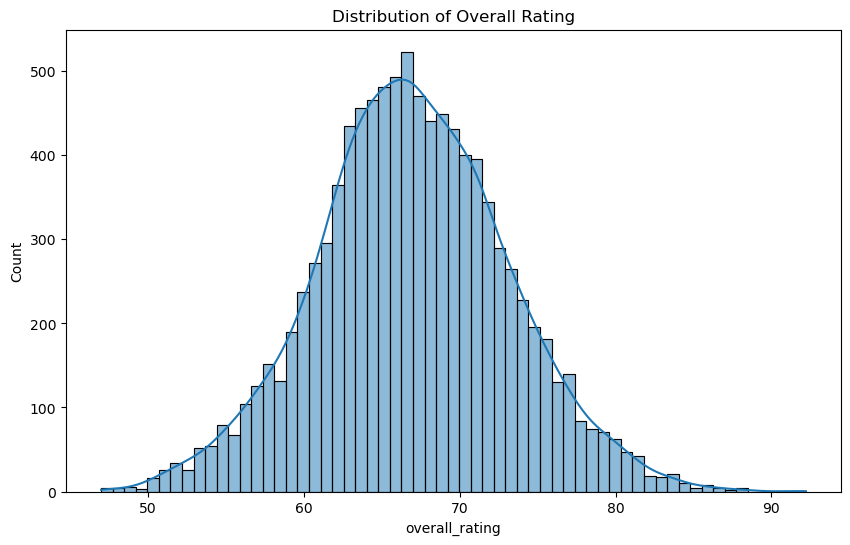

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for overall_rating
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='overall_rating', kde=True)
plt.title('Distribution of Overall Rating')
plt.show()

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_35951/504427727.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


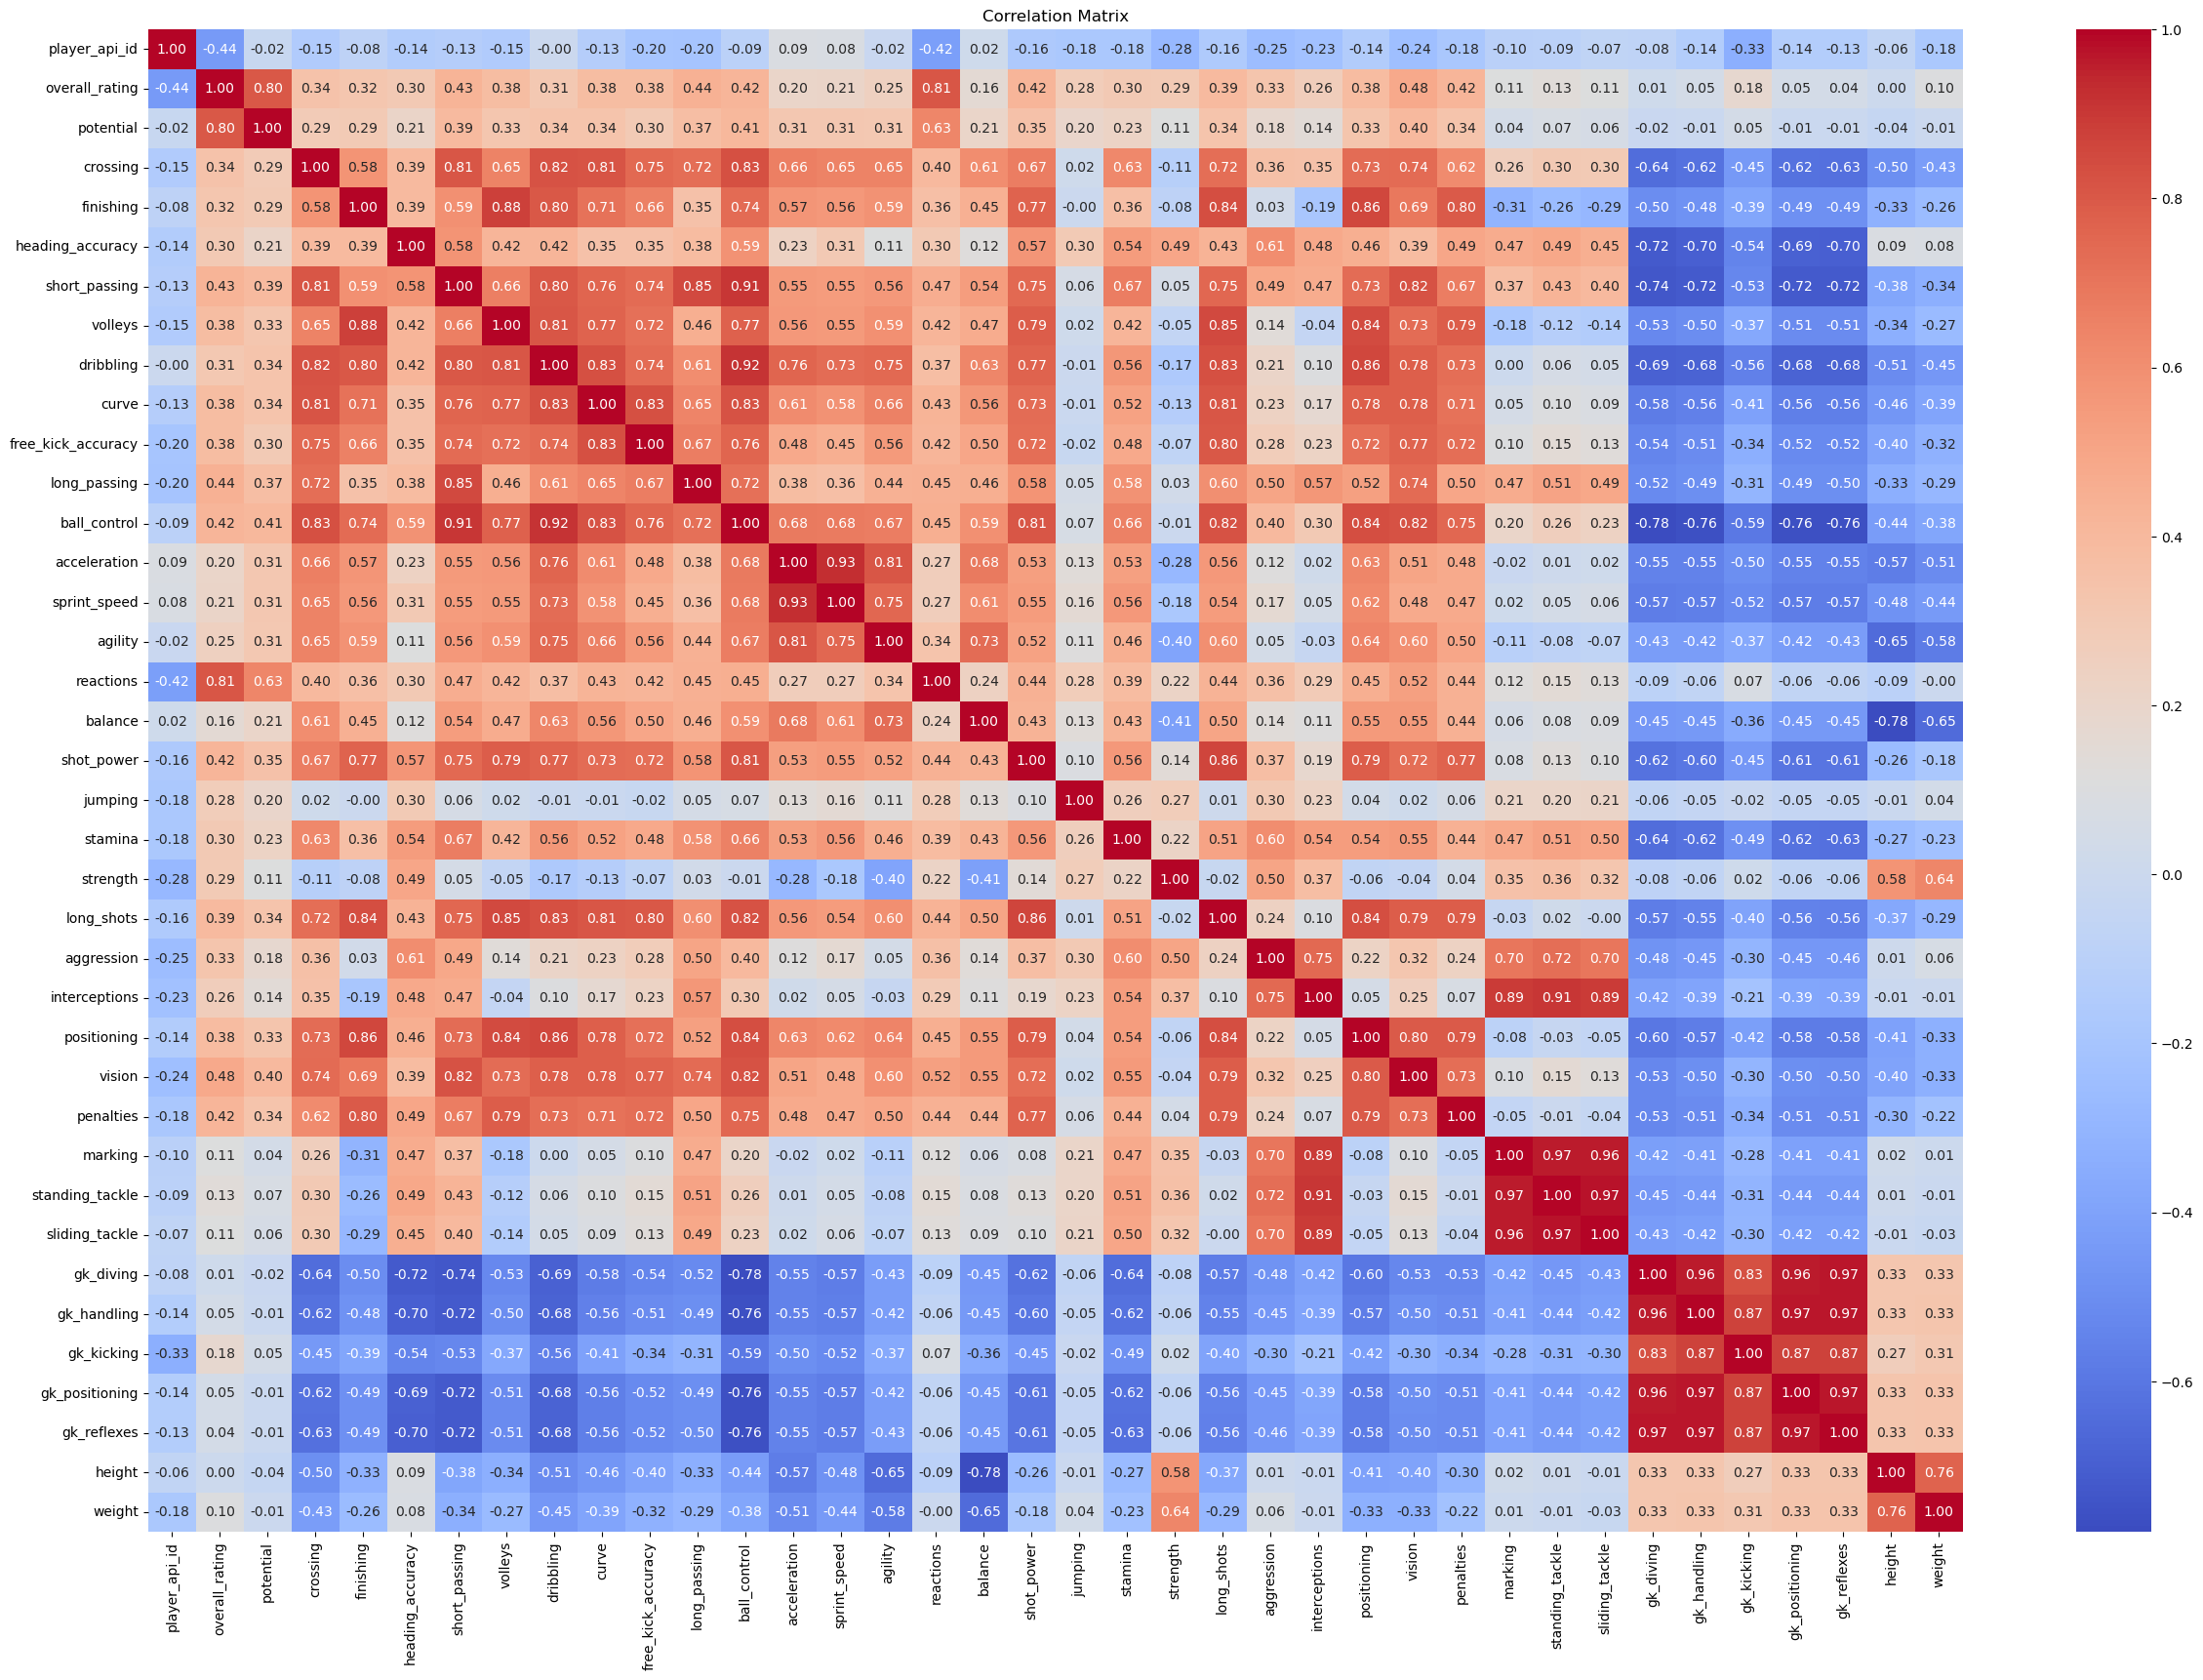

In [246]:
# Correlation matrix with heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

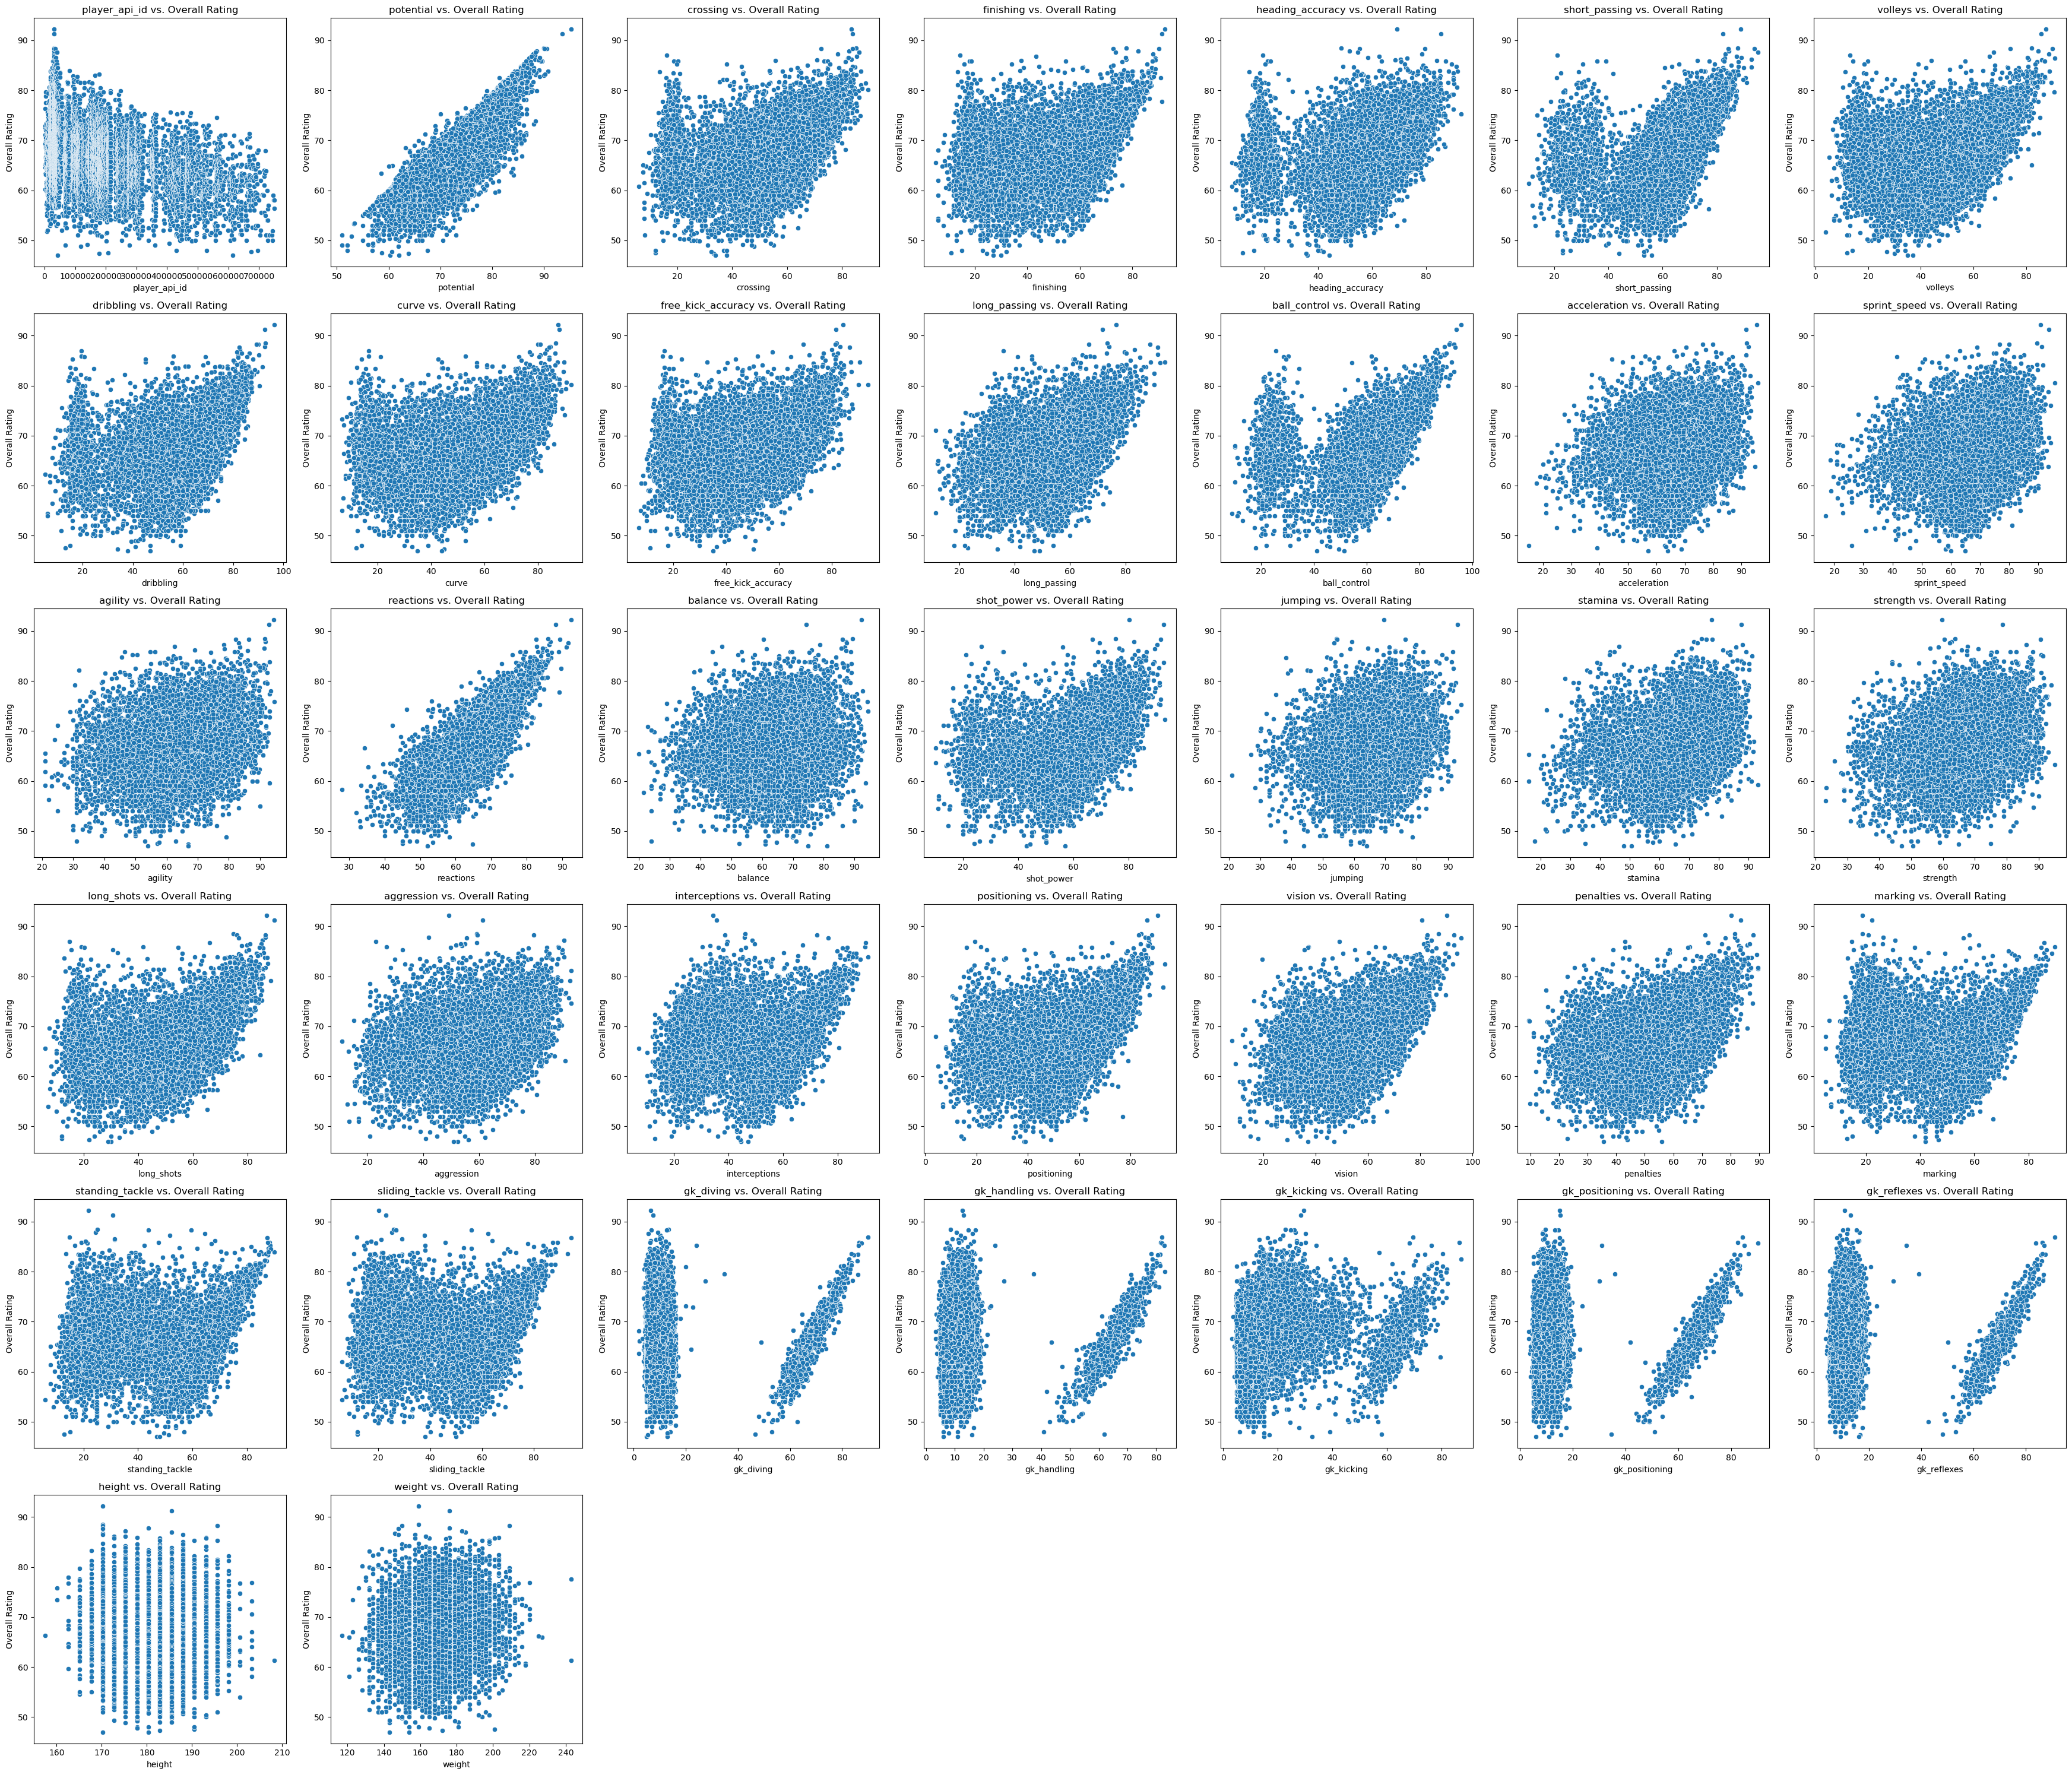

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features except 'overall_rating'
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.drop('overall_rating')

# Calculate the layout size (square root of the number of features gives a balanced grid)
n = len(numeric_features)
rows = int(n**0.5)
cols = n // rows if n % rows == 0 else n // rows + 1

# Create a larger figure to accommodate all subplots
plt.figure(figsize=(5*cols, 5*rows))

# Loop over numeric features to create scatter plots
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(data=df, x=feature, y='overall_rating')
    plt.title(f'{feature} vs. Overall Rating')
    plt.xlabel(feature)
    plt.ylabel('Overall Rating')

plt.tight_layout()
plt.show()


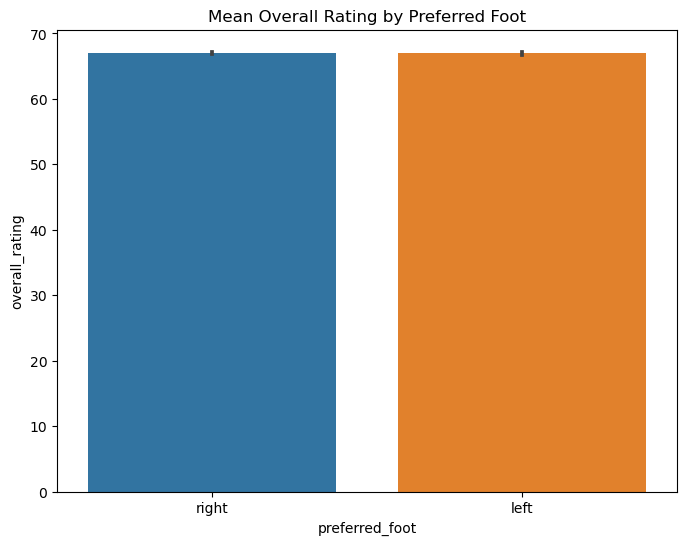

In [251]:
# Example for preferred_foot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='preferred_foot', y='overall_rating')
plt.title('Mean Overall Rating by Preferred Foot')
plt.show()

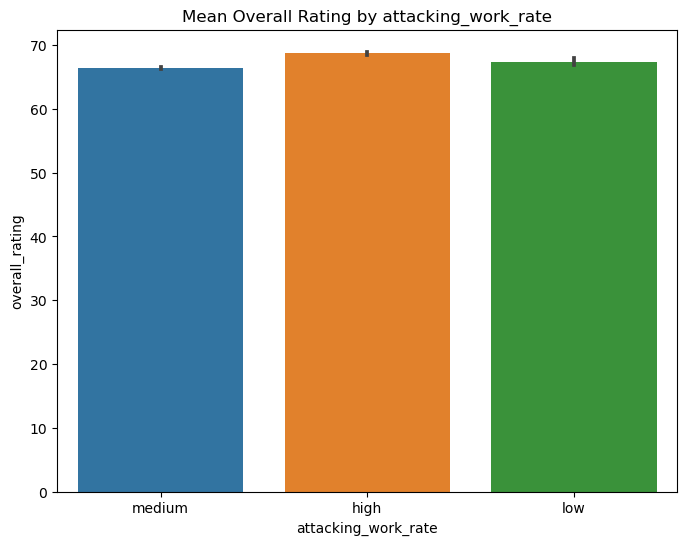

In [280]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='attacking_work_rate', y='overall_rating')
plt.title('Mean Overall Rating by attacking_work_rate')
plt.show()

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_35951/3021010807.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x= 'age', y='reactions', ci=None)


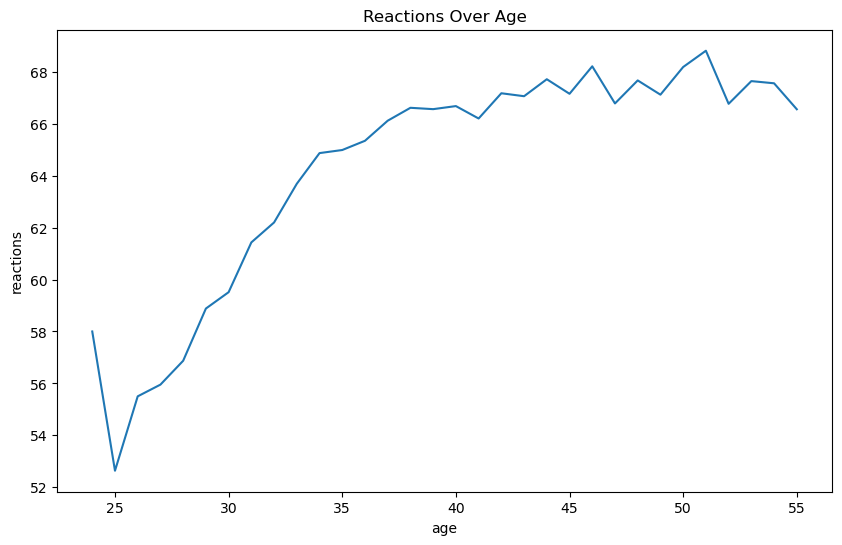

In [279]:
# Example for reactions over age
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x= 'age', y='reactions', ci=None)
plt.title('Reactions Over Age')
plt.show()

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_35951/3555177762.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x= 'weight', y='agility', ci=None)


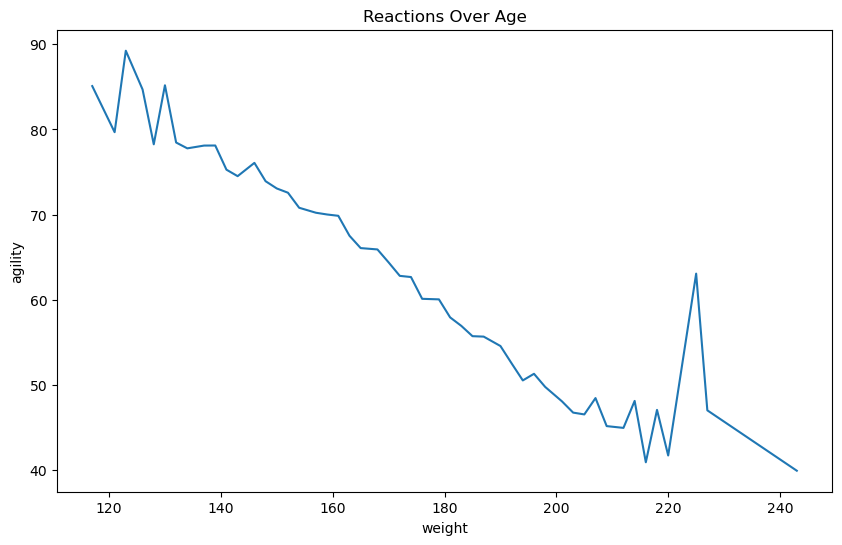

In [284]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x= 'weight', y='agility', ci=None)
plt.title('Reactions Over Age')
plt.show()

<h2> Modelling

<h4> Baseline

In [285]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the mean of the target variable in the training set
mean_train = y_train.mean()

# Create an array filled with the mean value, with the same shape as y_test
baseline_predictions = np.full(shape=y_test.shape, fill_value=mean_train)

# Compute the MSE for the baseline predictions
baseline_mse = mean_squared_error(y_test, baseline_predictions)
print(f"Baseline Model (Mean) MSE: {baseline_mse}")

Baseline Model (Mean) MSE: 37.73637259911164


In [286]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [288]:
X = df.drop(columns=['player_api_id', 'overall_rating'])
y = df['overall_rating']
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns
# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()}
# Dictionary to store MSE for each model
mse_scores = {}
# Loop through models, fit, predict, and compute MSE
for name, model in models.items():
    # Append regressor to preprocessing pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Compute and store MSE
    mse_scores[name] = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse_scores[name]}")


Linear Regression MSE: 3.4097614265957508
Ridge Regression MSE: 3.4097991818676148
Lasso Regression MSE: 6.504610283467142


In [290]:
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(f"Random Forest Regressor MSE: {mean_squared_error(y_test, y_pred_rf)}")

Random Forest Regressor MSE: 1.8413826004668679


In [292]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
}
# Initialize the GridSearchCV object
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# Fit it to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best MSE (negative):", grid_search.best_score_)

# Predict on the test set using the best found parameters
y_pred_best = grid_search.predict(X_test)

# Compute the MSE for the predictions
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Best Random Forest Regressor MSE: {mse_best}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'regressor__max_depth': 20, 'regressor__n_estimators': 300}
Best MSE (negative): -2.0139939350235743
Best Random Forest Regressor MSE: 1.82965912830981


In [293]:
# Extract feature importances from the regressor
feature_importances = model_rf.named_steps['regressor'].feature_importances_

In [294]:
# Assuming 'preprocessor' is your ColumnTransformer containing the 'cat' transformer for categorical features
cat_transformer = preprocessor.named_transformers_['cat']
# Get the categories for each categorical feature
categories = cat_transformer.categories_

# Assuming 'cat_cols' is the list of categorical columns
cat_feature_names = []
for col, cats in zip(cat_cols, categories):
    cat_feature_names.extend([f"{col}_{cat}" for cat in cats])

# Now, combine numeric and categorical feature names
all_feature_names = list(num_cols) + cat_feature_names

# Assuming 'feature_importances' is obtained from your RandomForestRegressor model
if len(all_feature_names) == len(feature_importances):
    importances_df = pd.DataFrame({
        "Feature": all_feature_names,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False)
    print(importances_df)
else:
    print("There is still a mismatch. Please review the preprocessing steps and manual feature name construction.")



                       Feature  Importance
14                   reactions    0.507099
0                    potential    0.289603
36                         age    0.091062
10                ball_control    0.016556
27             standing_tackle    0.012102
26                     marking    0.006121
3             heading_accuracy    0.005171
23                 positioning    0.004501
30                 gk_handling    0.004271
6                    dribbling    0.004239
32              gk_positioning    0.004139
22               interceptions    0.003690
29                   gk_diving    0.003442
16                  shot_power    0.003251
19                    strength    0.003212
1                     crossing    0.003028
2                    finishing    0.002502
31                  gk_kicking    0.002340
28              sliding_tackle    0.002327
21                  aggression    0.002204
33                 gk_reflexes    0.002188
17                     jumping    0.002183
20         

In [295]:
import pandas as pd

# Creating a DataFrame with the given MSE values for each model
mse_values = {
    "Model": [
        "Baseline Model (Mean)",
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Random Forest Regressor",
        "Random Forest Regressor (Hyperparameter Tuned)",
        "Neural-Nets"
    ],
    "MSE": [
        37.73637259911164,
        3.4097614265957508,
        3.4097991818676148,
        6.504610283467142,
        1.8413826004668679,
        1.82965912830981,
        0.6344447731971741
    ]
}

df_mse = pd.DataFrame(mse_values)
df_mse


Model        MSE
0                           Baseline Model (Mean)  37.736373
1                               Linear Regression   3.409761
2                                Ridge Regression   3.409799
3                                Lasso Regression   6.504610
4                         Random Forest Regressor   1.841383
5  Random Forest Regressor (Hyperparameter Tuned)   1.829659
6                                     Neural-Nets   0.634445

In [322]:
import pandas as pd
import numpy as np

# Sample a manageable number of rows randomly
sample_size = 200 
df_sample = df.sample(n=sample_size, random_state=42)

# Implement a vectorized comparison function for the sampled DataFrame
def find_sampled_pairs_with_higher_features_lower_rating(df, float_columns, rating_column):
    results = []
    for i in range(len(df)):
        # Vectorized comparison for all other rows
        higher_features = df[float_columns].lt(df.iloc[i][float_columns])
        lower_rating = df[rating_column] > df.iloc[i][rating_column]
        
        # Find rows that meet both criteria
        valid_indices = higher_features[lower_rating].index
        for j in valid_indices:
            if i != j:
                results.append((i, j))
        if len(results) >= 50:  # Stop once we find 50 instances
            break
    return results[:50]

float_cols = df_sample.select_dtypes(include='float64').columns.drop('overall_rating', errors='ignore')
results = find_sampled_pairs_with_higher_features_lower_rating(df_sample, float_cols, 'overall_rating')



In [324]:
print(results)

[(0, 4165), (0, 1479), (0, 6149), (0, 3298), (0, 4687), (0, 3393), (0, 388), (0, 2119), (0, 5688), (0, 3251), (0, 4030), (0, 2178), (0, 2470), (0, 7260), (0, 1496), (0, 96), (0, 6203), (0, 5328), (0, 311), (0, 3555), (0, 3101), (0, 5862), (0, 510), (0, 3107), (0, 1576), (0, 119), (0, 3079), (0, 6107), (0, 1453), (0, 6463), (0, 2273), (0, 4633), (0, 5508), (0, 2291), (0, 6842), (0, 31), (0, 2152), (0, 5034), (0, 1084), (0, 532), (0, 9406), (0, 5282), (0, 3122), (0, 4447), (0, 3941), (0, 4209), (0, 1617), (0, 5667), (0, 2108), (0, 304)]


In [326]:
correlation_matrix = df.corr()

# Print the Pearson correlation coefficients for a specific column 'target_variable'
# Replace 'target_variable' with the actual name of your target variable column.
print(correlation_matrix['overall_rating'])

player_api_id        -0.438219
overall_rating        1.000000
potential             0.803802
crossing              0.344238
finishing             0.319595
heading_accuracy      0.301237
short_passing         0.425380
volleys               0.378503
dribbling             0.310624
curve                 0.376872
free_kick_accuracy    0.376214
long_passing          0.441198
ball_control          0.416958
acceleration          0.201700
sprint_speed          0.213752
agility               0.246554
reactions             0.806076
balance               0.157970
shot_power            0.420483
jumping               0.275974
stamina               0.302464
strength              0.292059
long_shots            0.390377
aggression            0.332121
interceptions         0.264091
positioning           0.382596
vision                0.483534
penalties             0.423021
marking               0.110341
standing_tackle       0.132048
sliding_tackle        0.108606
gk_diving             0.014295
gk_handl

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_35951/3512085835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
